# Importing required libraries  

In [ ]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import xgboost as xgb

# Loading dataset into colab

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load dataset
data = pd.read_csv('/content/user_subscription_data.csv')

Saving user_subscription_data_1000.csv to user_subscription_data_1000 (2).csv


# Data preprocessing

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 1000 non-null   int64  
 1   age                     1000 non-null   int64  
 2   gender                  1000 non-null   object 
 3   subscription_length     1000 non-null   int64  
 4   average_session_length  1000 non-null   float64
 5   number_of_sessions      1000 non-null   int64  
 6   monthly_spend           1000 non-null   float64
 7   cancelled               1000 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
None


In [ ]:
# Overview of the dataset
print(data.head())

   user_id  age gender  subscription_length  average_session_length  \
0        1   62   Male                   21               94.140894   
1        2   65   Male                   18               51.579771   
2        3   18   Male                    1               81.683949   
3        4   21   Male                   35               72.738579   
4        5   21   Male                    2               79.019062   

   number_of_sessions  monthly_spend  cancelled  
0                 780      25.637732          0  
1                 968      49.590914          1  
2                 988      32.643937          0  
3                 161      82.346083          1  
4                 638      25.202159          0  


In [ ]:
# Checking for missing values
print(data.isnull().sum())

# Filling missing values or dropping rows/columns as necessary
data.fillna(method='ffill', inplace=True)

# Converting categorical variables to numerical
data = pd.get_dummies(data, drop_first=True)

# Splitting the features and target variable
X = data.drop('cancelled', axis=1)
y = data['cancelled']

user_id                   0
age                       0
gender                    0
subscription_length       0
average_session_length    0
number_of_sessions        0
monthly_spend             0
cancelled                 0
dtype: int64


<ipython-input-73-f4d5669a4c65>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
print(data.describe())

           user_id          age  subscription_length  average_session_length  \
count  1000.000000  1000.000000          1000.000000             1000.000000   
mean    500.500000    43.267000            17.801000               63.442832   
std     288.819436    15.242311             9.848472               33.286375   
min       1.000000    18.000000             1.000000                5.021472   
25%     250.750000    30.000000             9.750000               34.512189   
50%     500.500000    43.000000            17.000000               63.245856   
75%     750.250000    56.000000            27.000000               92.693228   
max    1000.000000    69.000000            35.000000              119.908920   

       number_of_sessions  monthly_spend    cancelled  
count         1000.000000    1000.000000  1000.000000  
mean           491.426000      55.609660     0.341000  
std            279.003282      25.902016     0.474283  
min              1.000000      10.073135     0.000000  

# Train and test.... split the dataset into 2 parts

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
Scaling the feature variables for better model performance.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Upgrading the libraries


In [ ]:
!pip install --upgrade xgboost scikit-learn

# Model Training
Train different models ( Random Forest and XGBoost , Logistic Regression ).

In [ ]:

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost Classifier (Updated)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Initializing the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#Model Evaluation of different models
Evaluating the models using confusion matrix, classification report, and ROC-AUC score.

# Prediction of randomforest

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       140
           1       0.30      0.15      0.20        60

    accuracy                           0.64       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.58      0.64      0.60       200



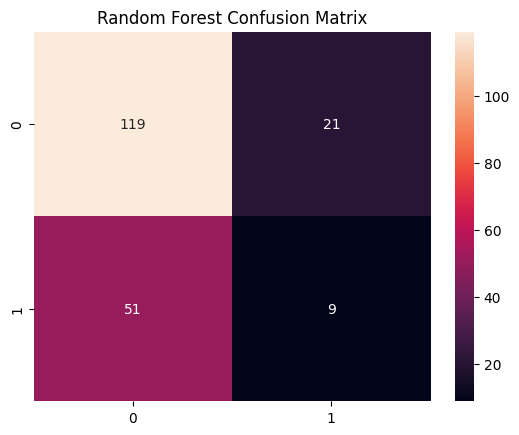

Random Forest ROC AUC: 0.53


In [ ]:

rf_predictions = rf_model.predict(X_test)

# Evaluation metrics for Random Forest
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC AUC
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print(f'Random Forest ROC AUC: {roc_auc_rf:.2f}')

# Prediction of extreme gradient boost

xgboost classifier Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       140
           1       0.33      0.30      0.32        60

    accuracy                           0.61       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.60      0.61      0.60       200

xgboost classifier Confusion Matrix:
[[104  36]
 [ 42  18]]
xgboost classifier ROC AUC:
0.5214285714285715


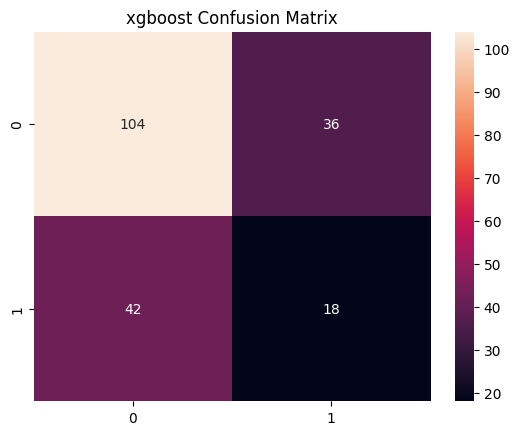

In [ ]:

xgb_predictions = xgb_model.predict(X_test)
# Evaluation metrics for xgboost
print("xgboost classifier Report:")
print(classification_report(y_test, xgb_predictions))
print("xgboost classifier Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))
print("xgboost classifier ROC AUC:")
print(roc_auc_score(y_test, xgb_predictions))
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d')
plt.title('xgboost Confusion Matrix')
plt.show()

# Prediction of logistic regression

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200

Logistic Regression Confusion Matrix:
[[140   0]
 [ 60   0]]
Logistic Regression ROC AUC:
0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  StrOptions({"micro", "macro", "samples", "weighted", "binary"}),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  StrOptions({"micro", "macro", "samples", "weighted", "binary"}),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  StrOptions({"micro", "macro", "samples", "weighted", "binary"}),


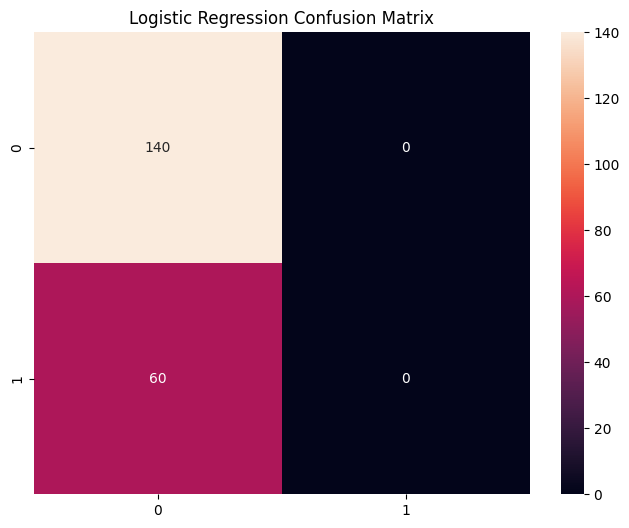

In [ ]:

logreg_predictions = logreg_model.predict(X_test)
# Evaluation metrics for logistic regression
print("Logistic Regression Report:")
print(classification_report(y_test, logreg_predictions))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logreg_predictions))
print("Logistic Regression ROC AUC:")
print(roc_auc_score(y_test, logreg_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logreg_predictions), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()




#Visualization of random forest feature importances

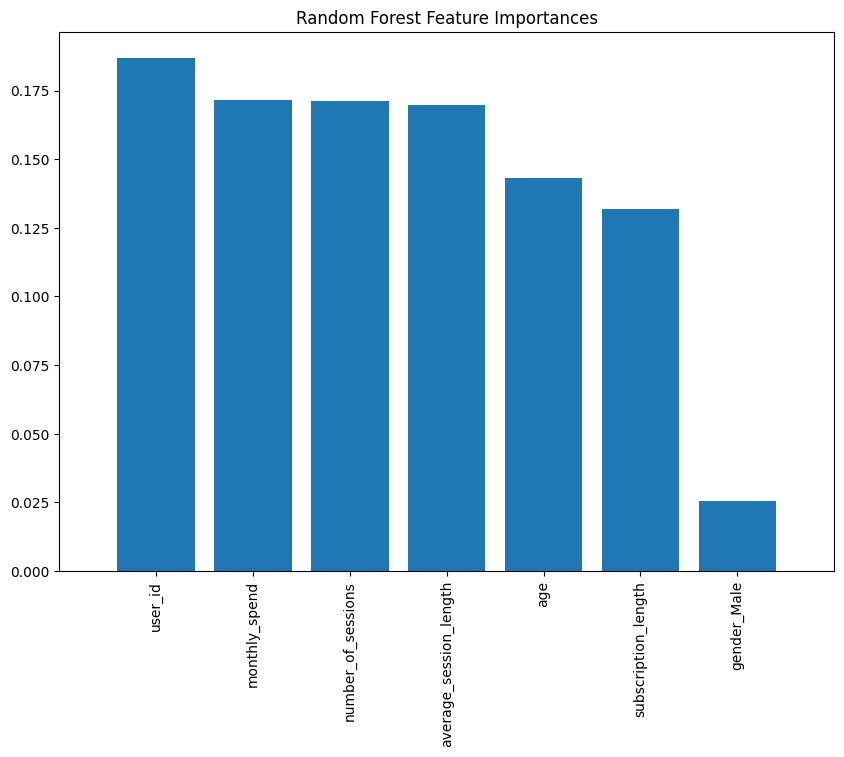

In [ ]:
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

#plotting the graph

plt.figure(figsize=(10,7))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#Visualization of logistic regression feature importances
 Extracting Feature Importances from Logistic Regression and Visualizing Feature Importances...[link text](https://)

In [ ]:

feature_names = X.columns
coefficients = logreg_model.coef_[0]  # Here accessing the first (and only) row for binary classification

# Creating a DataFrame for features and their corresponding coefficients
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculating the absolute value of coefficients for importance ranking
feature_importances['Importance'] = np.abs(feature_importances['Coefficient'])

# Sorting the DataFrame by importance
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances_sorted)

                  Feature  Coefficient  Importance
0                 user_id     0.107697    0.107697
1                     age    -0.067875    0.067875
5           monthly_spend    -0.043083    0.043083
3  average_session_length    -0.041507    0.041507
2     subscription_length     0.041200    0.041200
4      number_of_sessions    -0.035545    0.035545
6             gender_Male     0.013284    0.013284


<ipython-input-84-f9a5070508a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted.head(10), palette='viridis')


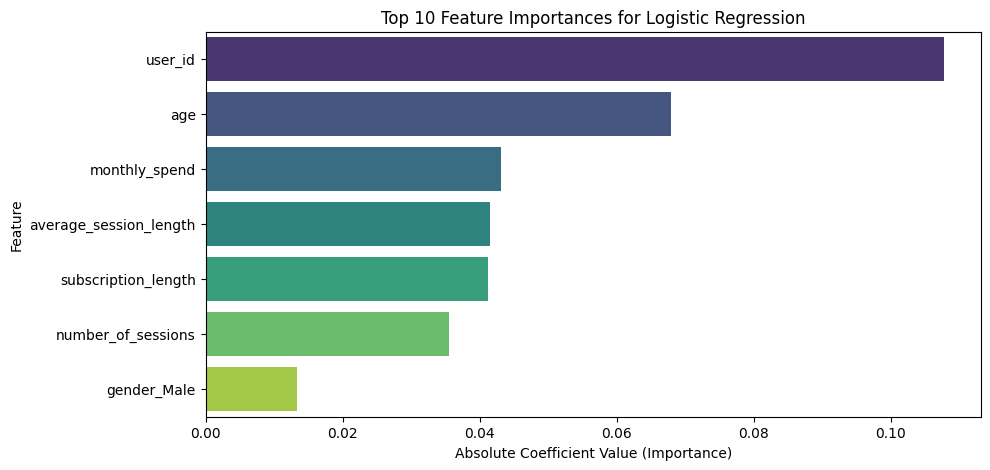

In [ ]:

# Plotting the feature importances

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Logistic Regression')
plt.xlabel('Absolute Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.show()

#Conclusion

Here we can see that Logistic Regression leads in accuracy compared to all other two models...and its having accuracy score upto 70% while other models having 64% , 61% .